## Classify heart disease using patients' age, maximum heart rate during strenuous exercise, and ST depression induced by exercise

### Introduction

Heart disease, *(cardiovascular disease)*, encompasses various conditions affecting the heart and blood vessels, often leading to heart attacks due to arterial blockages. Early identification and treatment are crucial to prevent severe complications. 

The *Heart Attack dataset* used provides 13 variables that are possibly linked to heart disease, with whether or not they developed the disease. This study aims **uses the K-nearest neighbors (KNN) algorithm to predict heart disease likelihood**, focusing on *age, maximum heart rate, and exercise-induced ST depression 

Scientifically, age is a key factor, especially in those aged 65 and older. Low maximum heart rate and ST depression are early heart disease symptoms. Reduced maximum heart rate indicates lower cardiovascular fitness, while ST depression on an electrocardiogram signals potential issues like myocardial ischemia.

Thus, the question being addressed is: **Can heart disease be accurately predicted based on a patient’s age, maximum heart rate during strenuous exercise, and ST depression induced by exercise?**


### Preliminary exploratory data analysis

In [1]:
#Import libraries and set seed to 1
library(tidyverse)
library(tidymodels)
library(repr)
set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Reading the dataframe from file
heart_data <- read_csv("Heart Attack Data Set.csv")

# Cleaning, warngling data
heart_clean_data <- heart_data |>
        mutate(target = as_factor(target))|>     
        mutate(target = fct_recode(target, "TRUE" = "1", "FALSE" = "0")) |> #Change target to factor TRUE/FALSE
        mutate(sex = as.factor(as.integer(sex)), cp = as.factor(as.integer(cp)), 
               fbs = as.factor(as.integer(fbs)), restecg = as.factor(as.integer(restecg)),
               exang = as.factor(as.integer(exang)), thal = as.factor(as.integer(thal)),
               ca = as.factor(as.integer(ca)), slope = as.factor(as.integer(slope)))  
head(heart_clean_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,TRUE
37,1,2,130,250,0,1,187,0,3.5,0,0,2,TRUE
41,0,1,130,204,0,0,172,0,1.4,2,0,2,TRUE
56,1,1,120,236,0,1,178,0,0.8,2,0,2,TRUE
57,0,0,120,354,0,1,163,1,0.6,2,0,2,TRUE
57,1,0,140,192,0,1,148,0,0.4,1,0,1,TRUE


In [3]:
# Splitting dataframe into training, testing datasets
heart_split <- initial_split(heart_clean_data, prop = 0.75, strata = target)

heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

In [4]:
#Exploratory data analysis
heart_ana <- heart_training |>
             group_by(target) |>
             summarize(n_of_obs = n(),
                       mean_age = mean(age),
                       mean_thalach = mean(thalach),
                       mean_oldpeak= mean(oldpeak),
                       missing_rows= sum(is.na(~.)))

heart_ana

Warning message:
“There were 2 warnings in `summarize()`.
The first warning was:
ℹ In argument: `missing_rows = sum(is.na(~.))`.
ℹ In group 1: `target = FALSE`.
Caused by warning in `is.na()`:
! is.na() applied to non-(list or vector) of type 'language'
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


target,n_of_obs,mean_age,mean_thalach,mean_oldpeak,missing_rows
<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>
FALSE,103,56.06796,139.9417,1.5825243,0
TRUE,123,53.50407,155.9756,0.6455285,0


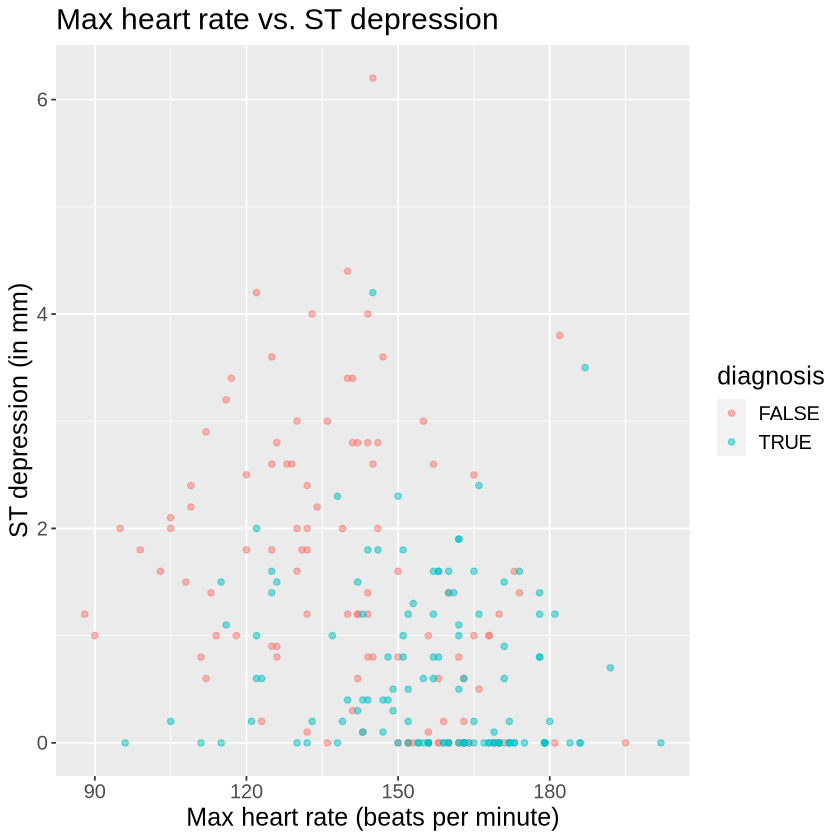

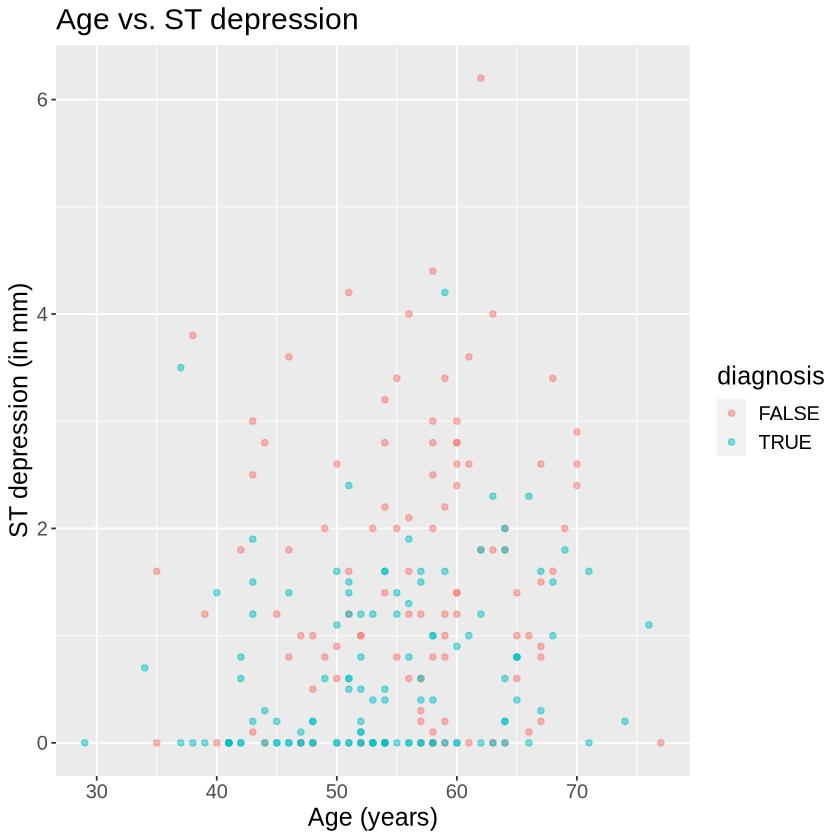

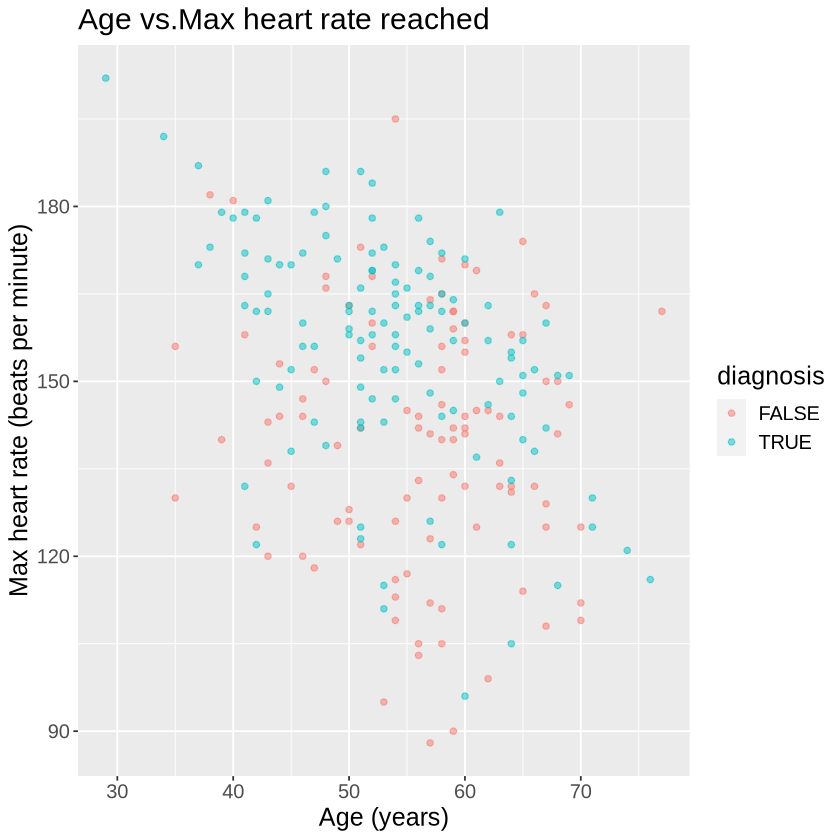

In [5]:
#plotting the training data
plot1 <- ggplot(heart_training, aes(x = thalach, y = oldpeak, color = target)) +
            geom_point(alpha = 0.5) +
            labs(x = "Max heart rate (beats per minute)", y = "ST depression (in mm)", color = "diagnosis", title = "Max heart rate vs. ST depression") +
            theme(text = element_text(size = 15))

plot2 <- ggplot(heart_training, aes(x = age, y = oldpeak, color = target)) +
             geom_point(alpha = 0.5) +
             labs(x = "Age (years)", y = "ST depression (in mm)", color = "diagnosis", , title = "Age vs. ST depression") +
             theme(text = element_text(size = 15)) 

plot3 <- ggplot(heart_training, aes(x = age, y = thalach, color = target)) +
             geom_point(alpha = 0.5) +
             labs(x = "Age (years)", y = "Max heart rate (beats per minute)", color = "diagnosis", title = "Age vs.Max heart rate reached") +
             theme(text = element_text(size = 15)) 

# Plot the three graphs
plot1
plot2
plot3

### Method

The columns we are using for the visualization include the following:

1. Target: 0 = False, 1 =True
2. Age: Age(in years)
3. Thalach: The greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise.
4. Oldpeak:  ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest.
5. n_of_obs: The number of observations.

Data Cleaning 
Firstly, we need to make the dataset tidy after reading the file, making it easier to analyze. We assigned appropriate data types to each variable, also, we changed 1,0 to True and False to make it more legible.

Data Splitting
After tidying, we utilized initial_split() to partition the data into 75% training and 25% testing data, ensuring a stratified split based on the target variable.

Data Summary
To create summary data, we considered the mean values of three predictors (Ages, Maximum heart rate during strenuous exercises, and ST depression induced by exercise relative to rest) to study the distribution of observations, because the mean values can reflect smaller deviations and are more reasonable. We used summarize to calculate the mean values. Besides, we used is.na() to check for missing values in the data frame.

Data Visualization
To find the relationships between our predictors and heart diseases, we created three scatter plots to see the data distribution. We colored the target and added clear titles to make the visualization more understandable. Be wary of overplotting, we used geom_point(alpha=0.5) for ST depression to address overlapping issues caused by numerous zero values. As a result, we observed the diagnosis from predictors and concluded from the trends of plots.